<a href="https://colab.research.google.com/github/Gwiill/Gwiill/blob/main/COLAB_AULAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 04 - 24/02/25

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/Mall_Customers.xlsx')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head() #cinco primeiros

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail() #cinco últimos

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info() #informações da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape #mostra a quantidade de linhas e colunas da base

(200, 5)

In [ ]:
df.describe() #mostra as estatísticas das colunas numéricas

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [ ]:
df.rename(columns={'Genre': 'genero'}, inplace=True)

In [ ]:
df.rename(columns={'Age': 'idade'}, inplace=True)


In [ ]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True)


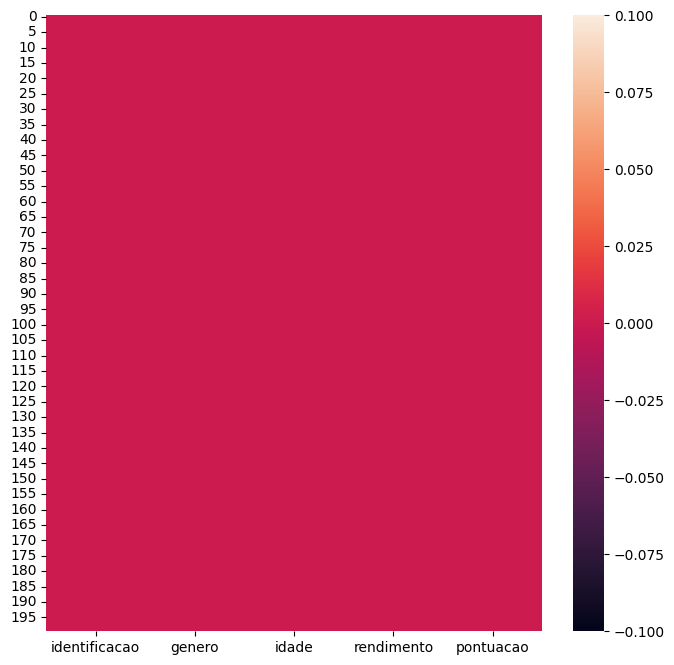

In [ ]:
f,ax = plt.subplots(figsize=(8,8));
sns.heatmap(df.isnull());

In [ ]:
df['pontuacao'].value_counts().sort_index()

,count
pontuacao,
1,2
3,1
4,2
5,4
6,2
...,...
94,1
95,2
97,2


In [ ]:
#Verificar os níveis da coluna idade
df['idade'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

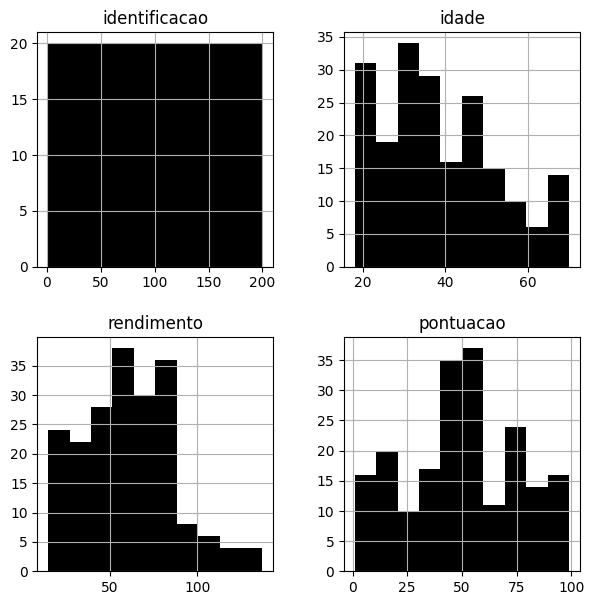

In [ ]:
df.hist(bins=10,figsize=(7,7),color='k');

In [ ]:
#Porcentagem dos valores para a coluna gênero
df['genero'].value_counts(normalize=True) * 100

,proportion
genero,
Female,56.0
Male,44.0


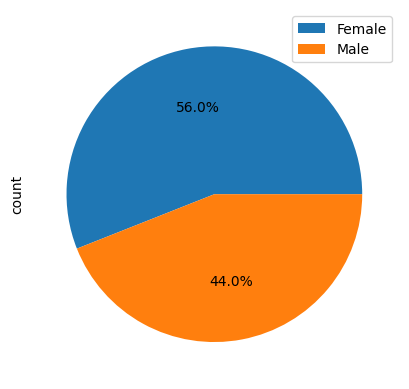

In [ ]:
#Visualização de dados para a Porcentagem dos valores para a coluna gênero
df['genero'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True);
# Observando a coluna Gênero verifica-se que a base está um pouco desbalanceada

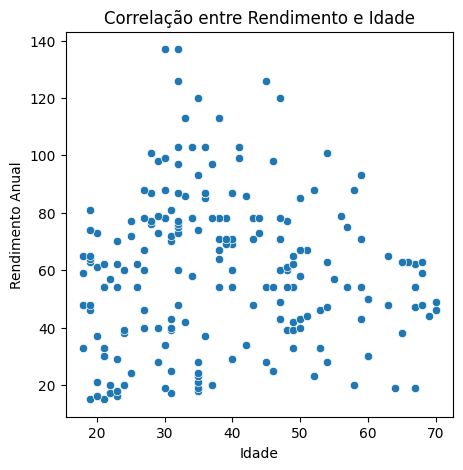

In [ ]:
#gráfico de correlação entre rendimento e idade
plt.figure(figsize=(5, 5))
sns.scatterplot(x='idade', y='rendimento', data=df)
plt.title('Correlação entre Rendimento e Idade')
plt.xlabel('Idade')
plt.ylabel('Rendimento Anual')
plt.show()

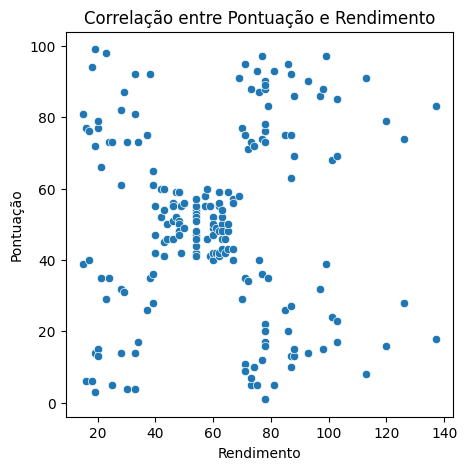

In [ ]:
#gráfico de correlação entre pontuação e rendimento anual
plt.figure(figsize=(5, 5))
sns.scatterplot(x='rendimento', y='pontuacao', data=df)
plt.title('Correlação entre Pontuação e Rendimento')
plt.xlabel('Rendimento')
plt.ylabel('Pontuação')
plt.show()

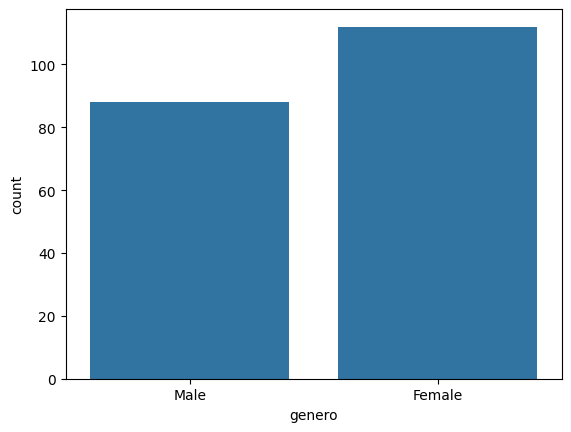

In [ ]:
#Gráfico de colunas comparando os gêneros
sns.countplot(x='genero', data=df);

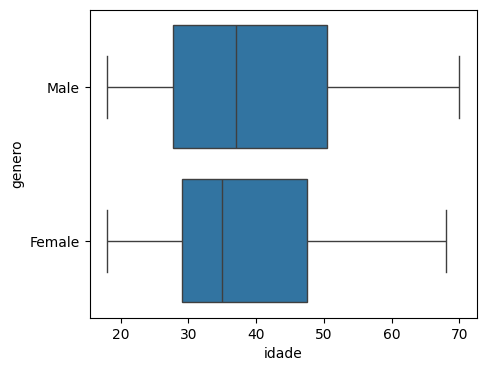

In [ ]:
#Boxplot para a Idade comparando os gêneros
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='idade', y='genero');
#as idades em termos de mediana são praticamente iguais,
#porém o Q3 do gênero feminino é menor que o do gênero masculino

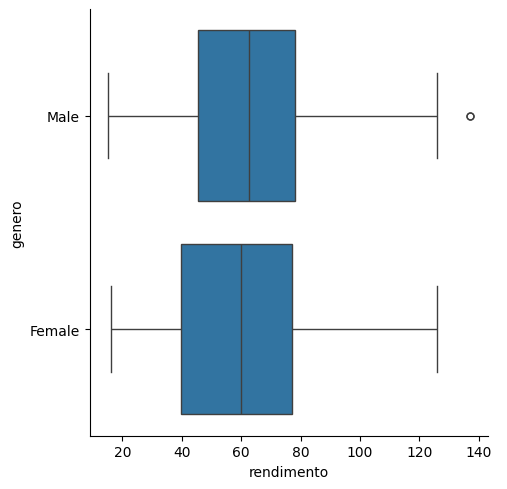

In [ ]:
sns.catplot(data=df, x='rendimento', y='genero', kind="box");

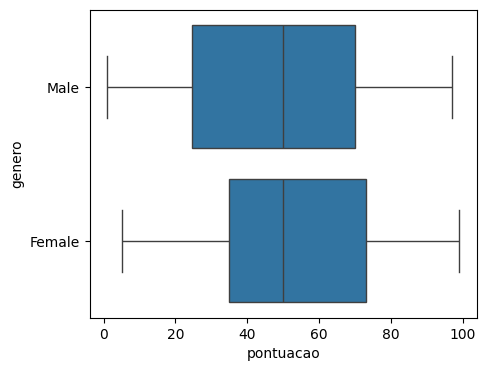

In [ ]:
#Boxplot para a pontuação comparando os gêneros
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='pontuacao', y='genero');
#não há diferença significativa com relação a pontuação
#levando em conta os anos de experiência

In [ ]:
from plotly.graph_objs import XAxis
hist =  px.histogram (df,  x = "idade", nbins=20)
hist.update_layout(width=600,height=400,title_text='Distribuição das idades',xaxis_title='idade',yaxis_title='frequencia')
hist.show()

In [ ]:
#bloxplot utilizando a biblioteca plotly
boxplot = px.box(df, y='idade', x='genero')
boxplot.show()

In [ ]:
boxplot = px.box(df, y='rendimento', x='genero')
boxplot.show()

In [ ]:
#Construir filtros

In [ ]:
filtro  = df['rendimento'] < 137
df1 = df[filtro]
df1

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [ ]:
filtro2  = df['rendimento'] >= 137
df2 = df[filtro2]
df2

,identificacao,genero,idade,rendimento,pontuacao
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
boxplot = px.box(df1, y='rendimento',x='genero')
boxplot.show()

In [ ]:
df3 = df.drop(labels = 'identificacao', axis = 1)

In [ ]:
df3.head()

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df3['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [ ]:
df3.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


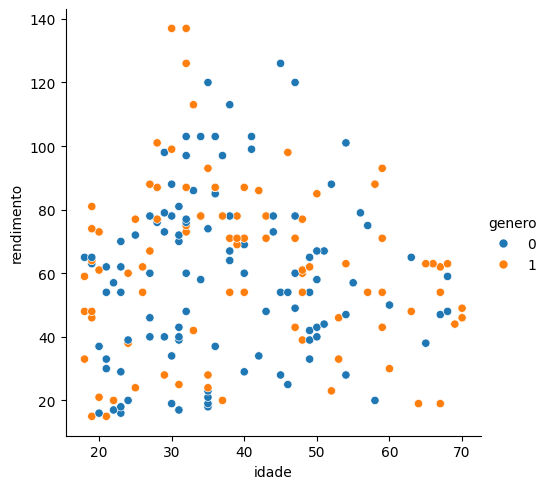

In [ ]:
sns.relplot(data=df3, x='idade', y='rendimento', hue='genero');

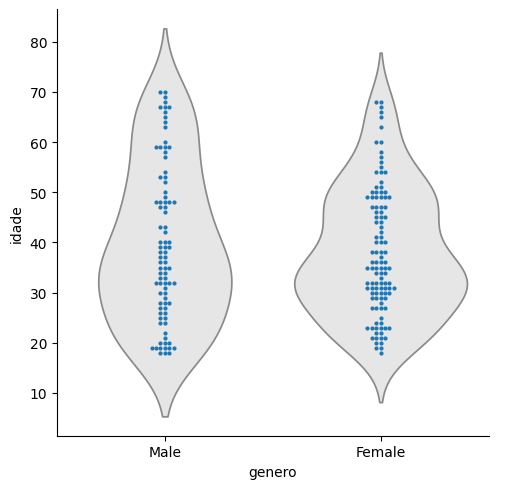

In [ ]:
sns.catplot(data=df, x='genero', y='idade', kind="violin", color=".9", inner=None);
sns.swarmplot(data=df, x='genero', y='idade', size=3);

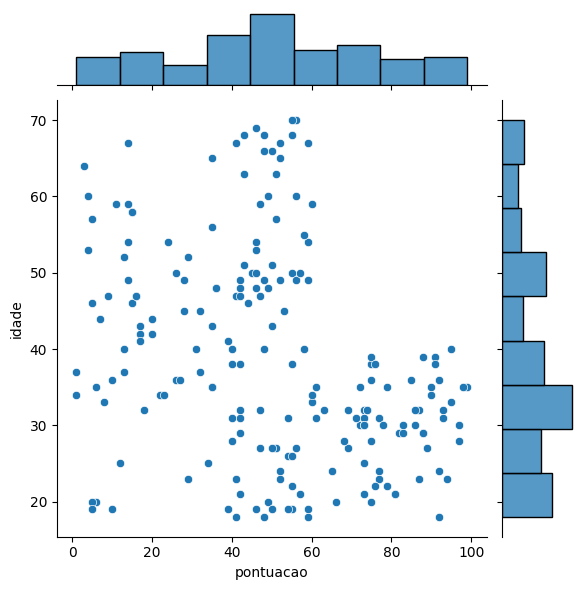

In [ ]:
sns.jointplot(x = "pontuacao", y = "idade", kind = "scatter", data = df)
plt.show()

# Aula 03 - 17/02/25

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Criar a lista índice
indice=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]


#Criar as colunas
colunas=['valores_1','valores_2']


#Criar os dados para cada uma das colunas
dados=[[5,8.5],[8,4.8],[9,7.9],[10,6.4],[6,7.6],[7,3.7],[5,5.2],[8,8.6],[9,2.9],[5,5.8],[4,7.4],[3,6.3],[7,2.7],[2,8.2]]

In [ ]:
# Criando lista paciente
paciente=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
paciente

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [ ]:
# Criando lista sexo
sexo=['F','F','M','F','M','M','M','M','M','M','M','F','M','M','M','F','F','M','M','F','F','M']
sexo

['F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M']

In [ ]:
# Criando lista idade
idade=[49,61,34,73,47,58,43,71,32,56,61,49,80,72,47,48,37,71,74,21,45,38]
idade


[49,
 61,
 34,
 73,
 47,
 58,
 43,
 71,
 32,
 56,
 61,
 49,
 80,
 72,
 47,
 48,
 37,
 71,
 74,
 21,
 45,
 38]

In [ ]:
# Criando lista tamanho do cisto
tamanhoDoCisto=[6,10,8.2,3,3.6,10,1,1,7,1,6.6,4,3.1,2.3,10.5,6.5,13,1,7,12,8.5,10]
tamanhoDoCisto


[6,
 10,
 8.2,
 3,
 3.6,
 10,
 1,
 1,
 7,
 1,
 6.6,
 4,
 3.1,
 2.3,
 10.5,
 6.5,
 13,
 1,
 7,
 12,
 8.5,
 10]

In [ ]:
# Criando lista Localização do cisto
localizacaoDoCisto=['cabeça','cabeça','cauda','colo','cabeça','colo','cabeça','cabeça','cauda','cabeça','calda','cabeça','calda', 'cabeça','cabeça','corpo','corpo', 'colo','cabeça', 'corpo','corpo','colo']
localizacaoDoCisto

['cabeça',
 'cabeça',
 'cauda',
 'colo',
 'cabeça',
 'colo',
 'cabeça',
 'cabeça',
 'cauda',
 'cabeça',
 'calda',
 'cabeça',
 'calda',
 'cabeça',
 'cabeça',
 'corpo',
 'corpo',
 'colo',
 'cabeça',
 'corpo',
 'corpo',
 'colo']

In [ ]:
paciente=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

In [ ]:
sexo_paciente=['F','F','M','F','M','M','M','M','M','M','M','F','M','M','M','F','F','M','M','F','F','M']


In [ ]:
idade=[49,61,34,73,47,58,43,71,32,56,61,49,80,72,47,48,37,71,74,21,45,38]


In [ ]:
tamanho_cisto=[6,10,8.2,3,3.6,10,1,1,7,1,6.6,4,3.1,2.3,10.5,6.5,13,1,7,12,8.5,10]


In [ ]:
localizacao=['cabeça','cabeça','cauda','colo','cabeça','colo','cabeça','cabeça','cauda','cabeça','corpo','cabeça','cauda','cabeça','cabeça','corpo','corpo','colo','cabeça','corpo','corpo','colo']


In [ ]:
cisto_pancreas = pd.DataFrame({"Paciente": paciente, "Sexo" : sexo_paciente, "Idade" : idade,"Tamanho do cisto" : tamanho_cisto,"Localização" : localizacao})


In [ ]:
cisto_pancreas

,Paciente,Sexo,Idade,Tamanho do cisto,Localização
0,1,F,49,6.0,cabeça
1,2,F,61,10.0,cabeça
2,3,M,34,8.2,cauda
3,4,F,73,3.0,colo
4,5,M,47,3.6,cabeça
5,6,M,58,10.0,colo
6,7,M,43,1.0,cabeça
7,8,M,71,1.0,cabeça
8,9,M,32,7.0,cauda
9,10,M,56,1.0,cabeça


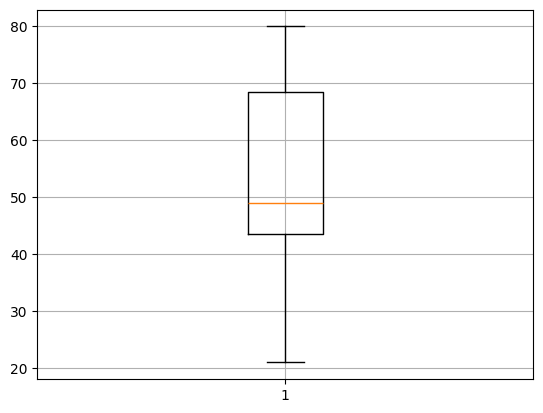

In [ ]:
##Construir o Boxplot Idade (serve para identificar a existência de pontos fora dos padrões dentro da coluna no dataframe)
plt.figure(dpi=100)
plt.boxplot(data=cisto_pancreas,x='Idade')
plt.grid()
plt.show()

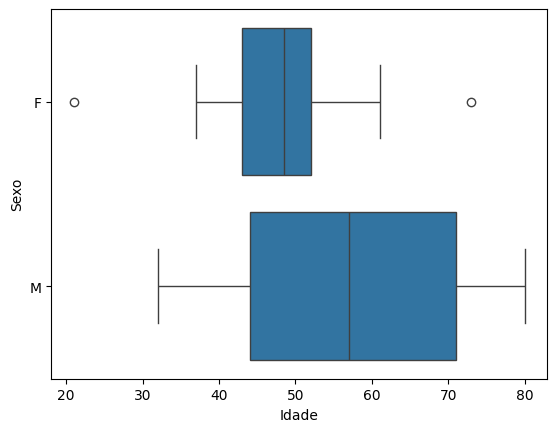

In [ ]:
#Boxplot para a idade comparando os sexos
sns.boxplot(data=cisto_pancreas, x='Idade', y='Sexo');


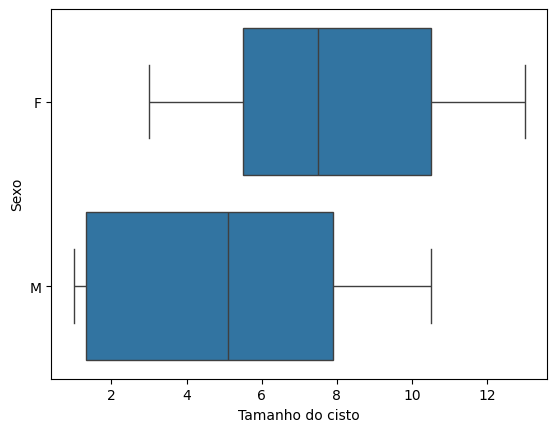

In [ ]:
#Boxplot para a idade comparando o tamanho do cisto entre os sexos
sns.boxplot(data=cisto_pancreas, x='Tamanho do cisto', y='Sexo');


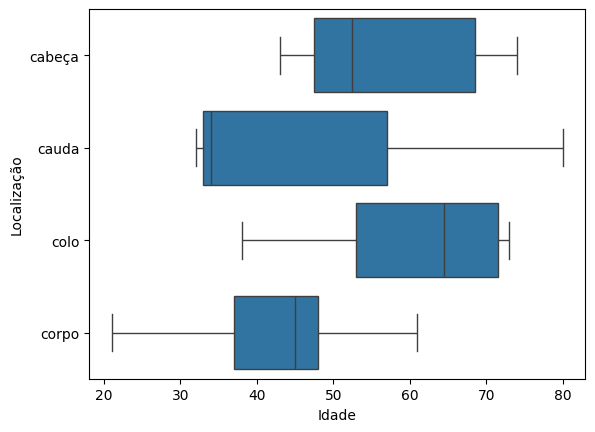

In [ ]:
#Boxplot para a idade comparando a localização
sns.boxplot(data=cisto_pancreas, x='Idade', y='Localização');


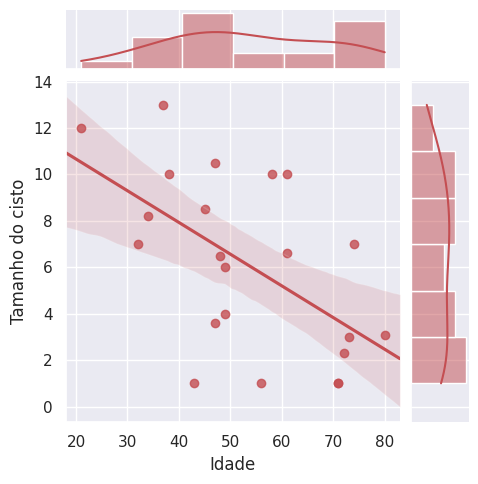

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x='Idade', y='Tamanho do cisto', data=cisto_pancreas, kind='reg', truncate=False, color="r", height=5);

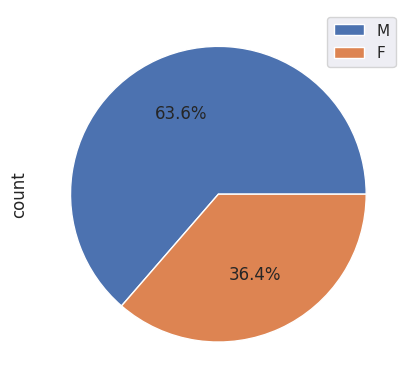

In [ ]:
#Visualização de dados para a Porcentagem dos valores para a coluna Sexo
cisto_pancreas['Sexo'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True);


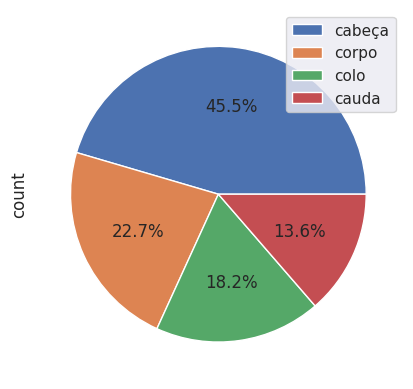

In [ ]:
#Visualização de dados para a Porcentagem dos valores para a coluna Sexo
cisto_pancreas['Localização'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True);


# ADO entrega.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Lista 1: {'Média': 25.818181818181817, 'Mediana': 22.0, 'Mínimo': 20, 'Máximo': 51}

Lista 2: {'Média': 21.454545454545453, 'Mediana': 21.0, 'Mínimo': 19, 'Máximo': 24}

Lista 3: {'Média': 21.181818181818183, 'Mediana': 20.0, 'Mínimo': 19, 'Máximo': 28}

Lista 4: {'Média': 24.142857142857142, 'Mediana': 21.5, 'Mínimo': 19, 'Máximo': 37}

Todos os Dados: {'Média': 23.21276595744681, 'Mediana': 22.0, 'Mínimo': 19, 'Máximo': 51}



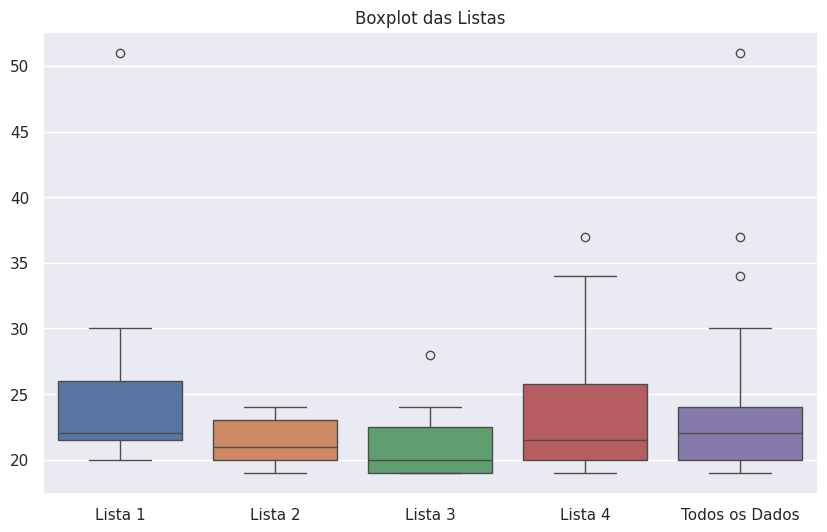

In [ ]:
# Lista de valores
dados = [30,22,26,20,22,21,51,20,22,26,24,21,22,22,19,20,20,20,24,20,24,24,24,20,19,19,19,28,22,19,20,23,20,19,21,30,34,37,25,20,26,20,22,24,21,19,20]

# Dividir em 4 listas
tamanho = len(dados) // 4
lista1 = dados[:tamanho]
lista2 = dados[tamanho:2*tamanho]
lista3 = dados[2*tamanho:3*tamanho]
lista4 = dados[3*tamanho:]

listas = [lista1, lista2, lista3, lista4, dados]  # Inclui a lista completa
nomes = ["Lista 1", "Lista 2", "Lista 3", "Lista 4", "Todos os Dados"]

# Calcular estatísticas
def estatisticas(lista):
    return {
        "Média": np.mean(lista),
        "Mediana": np.median(lista),
        "Mínimo": np.min(lista),
        "Máximo": np.max(lista)
    }

# Exibir estatísticas
for i, lista in enumerate(listas):
    print(f"{nomes[i]}: {estatisticas(lista)}\n")

# Gerar Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=listas)
plt.xticks(ticks=range(len(nomes)), labels=nomes)
plt.title("Boxplot das Listas")
plt.show()

# AULA - 01 - 03/02/25

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Criar uma lista
lista_1=[5,8,9,10,6,7,5,8,9,5,4,3,7,2]
lista_1

[5, 8, 9, 10, 6, 7, 5, 8, 9, 5, 4, 3, 7, 2]

In [ ]:
#calculo da média - primeira forma
media_1=np.average(lista_1)
media_1


6.285714285714286

In [ ]:
#calculo da média - segunda forma
media_1=np.mean(lista_1)
media_1

6.285714285714286

In [ ]:
#calculo da mediana
mediana_1=np.median(lista_1)
mediana_1


6.5

In [ ]:
#calculo do valor mínimo
minimo_1=np.min(lista_1)
minimo_1

2

# AULA - 02 - 10/02/25


In [ ]:
#Criar uma lista
grupo_1=[7.5,8,9,10,7,7,5,8,9,5,6.5,4.5,7,6,8]
grupo_1

[7.5, 8, 9, 10, 7, 7, 5, 8, 9, 5, 6.5, 4.5, 7, 6, 8]

In [ ]:
#calculo do valor mínimo
minimo_g1=np.min(grupo_1)
minimo_g1


4.5

In [ ]:
#calculo do valor máximo
maximo_g1=np.max(grupo_1)
maximo_g1

10.0

In [ ]:
#calculo da média - segunda forma
media_g1=np.mean(grupo_1)
media_g1

7.166666666666667

In [ ]:
#calculo da mediana
mediana_g1=np.median(grupo_1)
mediana_g1

7.0

In [ ]:
#Criar uma lista
grupo_2=[5.5,8.4,6.9,4.8,7.7,7,3,8,9,5,8.5,9.5,7,6,12]
grupo_2

[5.5, 8.4, 6.9, 4.8, 7.7, 7, 3, 8, 9, 5, 8.5, 9.5, 7, 6, 12]

In [ ]:
#calculo do valor mínimo
minimo_g2=np.min(grupo_2)
minimo_g2

3.0

In [ ]:
#calculo da média - segunda forma
media_g2=np.mean(grupo_2)
media_g2


7.22

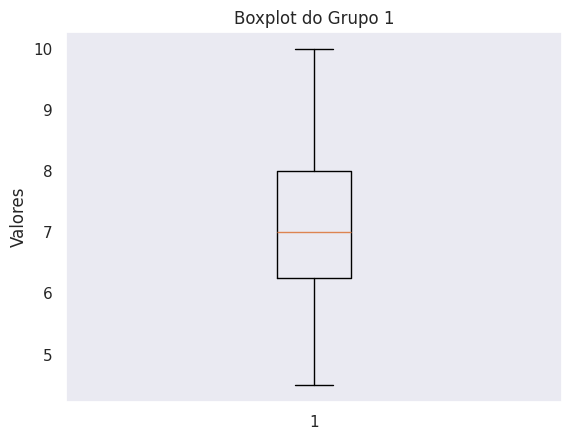

In [ ]:
##Construir o Boxplot para o grupo_1 (serve para identificar a existência de pontos fora dos padrões dentro da coluna no dataframe)
plt.figure(dpi=100)
plt.title('Boxplot do Grupo 1')
plt.ylabel('Valores')
plt.boxplot(grupo_1)
plt.grid()
plt.show()

In [ ]:
# Criar o boxplot com Plotly Express
fig = px.box(y=grupo_1, title='Boxplot do Grupo 1 usando Plotly Express')
fig.update_yaxes(title_text='Valores') #adicionando nome ao eixo y
fig.show()

# AULA - 05 - 10/03/25

In [ ]:
#Leitura e manipulação de dados
import pandas as pd

#Manipulação de Matrizes e cálculos algébricos
import numpy as np

#Visualização de dados através de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Descartar warnings para a criação de gráficos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Lendo a Base de Dados
df = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
#Analisando as dimensões
df.shape

(1000, 8)

In [ ]:
#Cabeçalho
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
#Observando o cabeçalho
#gender = gênero
#race/ethnicity = raça/etnia
#parental level of education = nível de escolaridade dos pais
#lunch = opção de refeição antes da realização das provas
#test preparation course = curso preparatório para a prova
#math score = nota de matemática
#reading score = nota de leitura
#writing score = nota de redação

In [ ]:
#Verificação da Quantidade de Elementos Unicos
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
#Verificação de Campos Duplicados
df.duplicated().sum()

0

In [ ]:
#Verificação da existência de campos nulos
# Campos nulos
nulos = df.isnull()

Text(0.5, 1.0, 'Analise campos nulos')

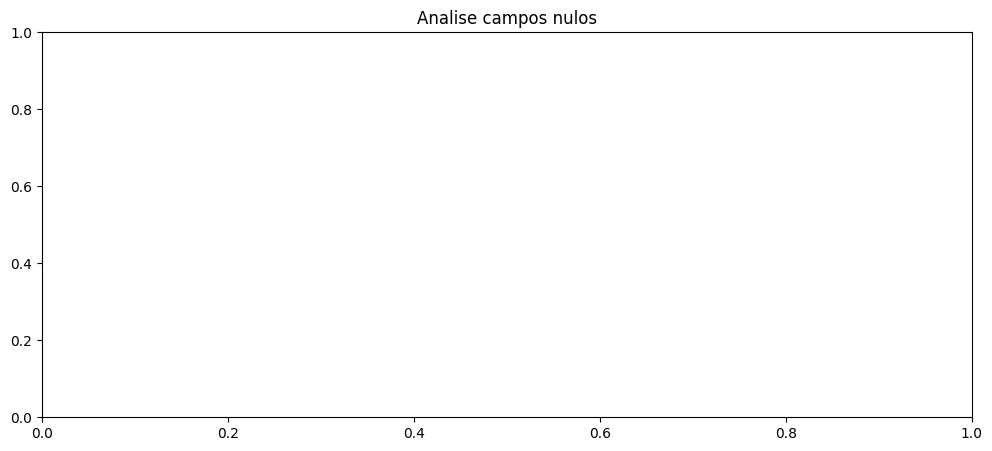

In [ ]:
#criação da imagem
plt.figure(figsize=(12,5))
plt.title('Analise campos nulos')

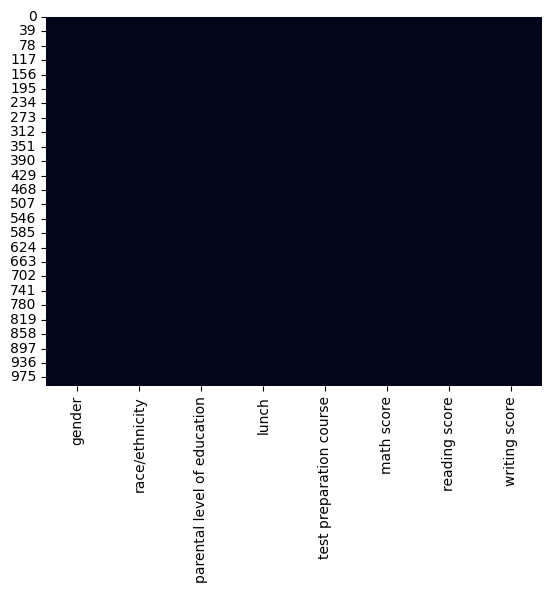

In [ ]:
#mapa de calor
sns.heatmap(nulos, cbar=False );

In [ ]:
#print(nulos)
#nulos

In [ ]:
#Estatística Descritiva
#Informações das Colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#Estatistca Descritiva
#Só serve para dados numéricos
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#Porcentagem dos valores para a coluna gênero
df['gender'].value_counts(normalize=True) * 100

,proportion
gender,
female,51.8
male,48.2


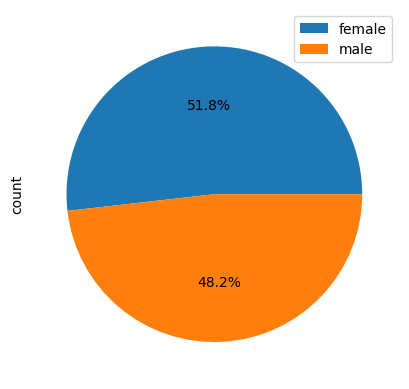

In [ ]:
#Visualização de dados para a Porcentagem dos valores para a coluna gênero
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True);

In [ ]:
#Porcentagem dos valores para a coluna raça/etnia
df['race/ethnicity'].value_counts(normalize=True) * 100

,proportion
race/ethnicity,
group C,31.9
group D,26.2
group B,19.0
group E,14.0
group A,8.9


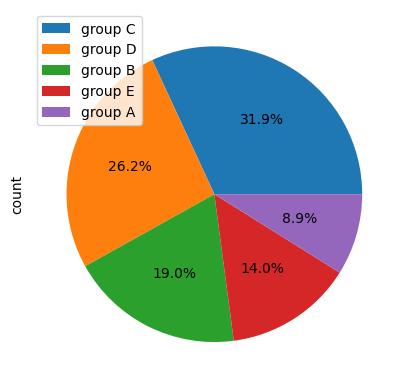

In [ ]:
#Visualização de dados para a Porcentagem dos valores para a coluna gênero
df['race/ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True);

In [ ]:
#Porcentagem dos valores para a coluna raça/etnia
df['race/ethnicity'].value_counts(normalize=True) * 100

,proportion
race/ethnicity,
group C,31.9
group D,26.2
group B,19.0
group E,14.0
group A,8.9


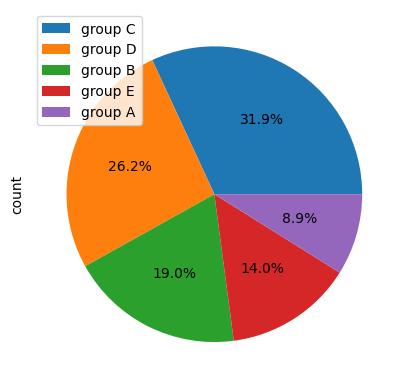

In [ ]:
#Visualização de dados para a Porcentagem dos valores para a coluna raça/etnia com legenda
df['race/ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True);

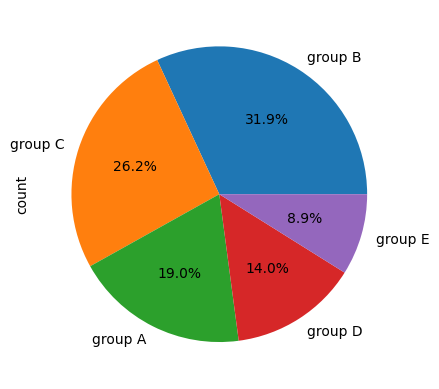

In [ ]:
#Visualização de dados para a Porcentagem dos valores para a coluna raça/etnia sem legenda
df['race/ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', labels=df['race/ethnicity'].unique(), legend=False);

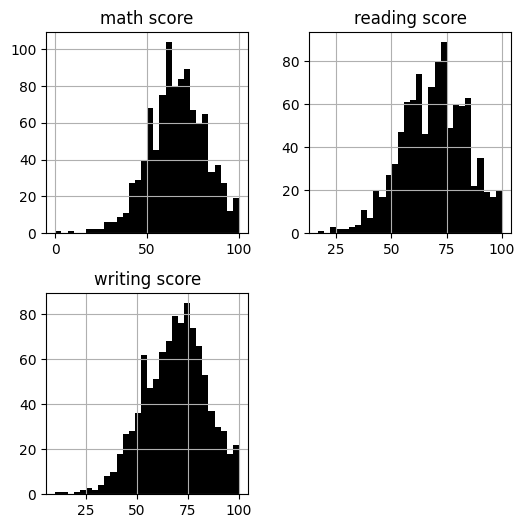

In [ ]:
#Histograma das colunas numéricas
df.hist(bins = 30, figsize=(6,6), color = 'k');

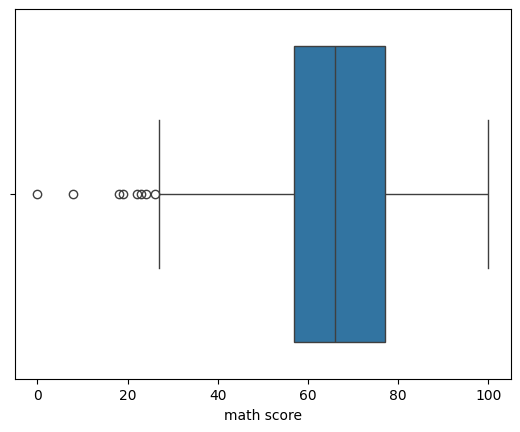

In [ ]:
#Boxplot para a nota de matemática
sns.boxplot(data=df, x='math score');

In [ ]:
fig = px.box(df, y="math score")
fig.show()

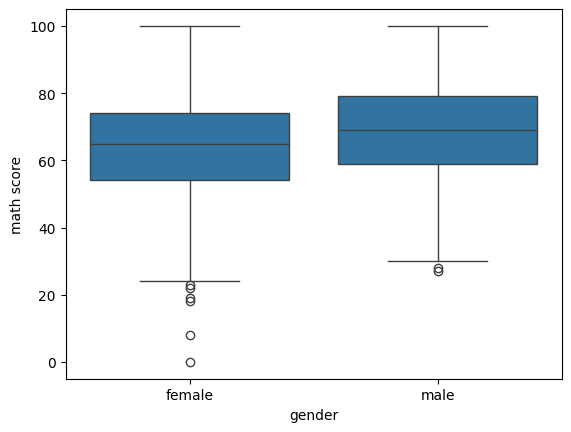

In [ ]:
#Boxplot Seaborn para a nota de matemática separando por gênero
sns.boxplot(data=df, y='math score', x='gender');

In [ ]:
#Boxplot Plotly para a nota de matemática separando por gênero
fig = px.box(df, y="math score", x='gender')
fig.show()

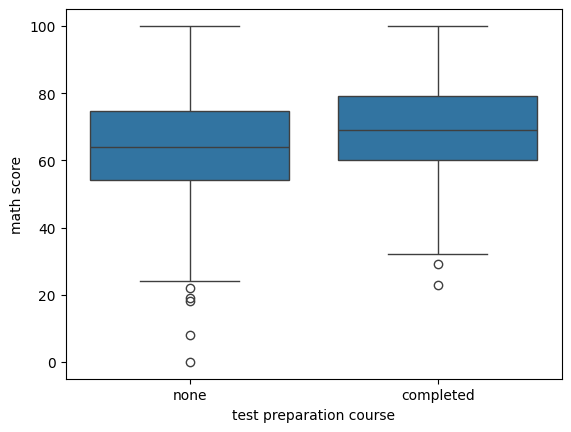

In [ ]:
#Boxplot Seaborn para a nota de matemática separando por curso preparatório
sns.boxplot(data=df, y='math score', x='test preparation course');

In [ ]:
#Boxplot Plotly para a nota de matemática separando por curso preparatório
fig = px.box(df, y="math score", x='test preparation course')
fig.show()

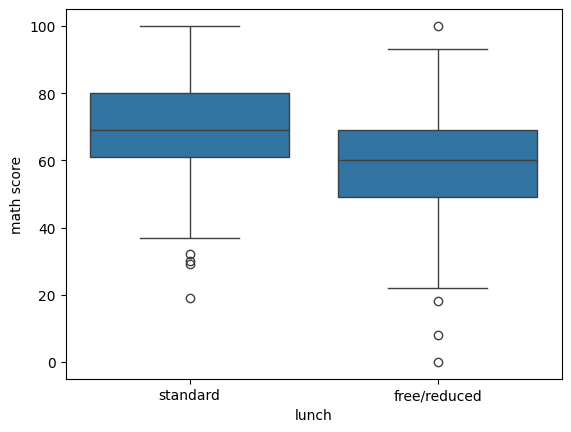

In [ ]:
#Boxplot Seaborn para a nota de matemática separando por refeição
sns.boxplot(data=df, y='math score', x='lunch');


In [ ]:
#Boxplot Plotly para a nota de matemática separando por refeição
fig = px.box(df, y="math score", x='lunch')
fig.show()

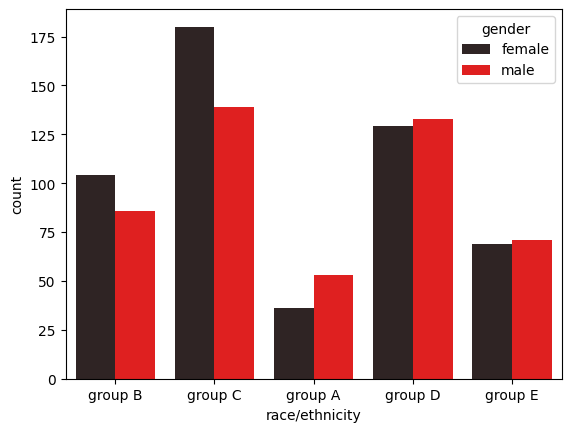

In [ ]:
#Estratificação da separação dos dados de acordo com os grupos de etnia e gênero
sns.countplot(data=df, x= df["race/ethnicity"], hue="gender", color="red");

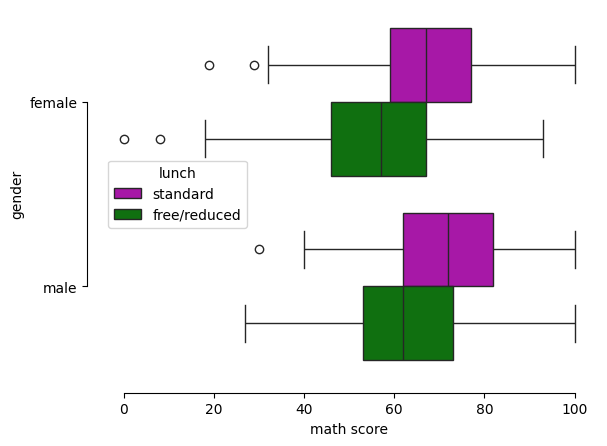

In [ ]:
#Boxplot para a nota de matemática comparando o tipo de refeição realizada antes da prova
sns.boxplot(x="math score", y="gender", hue="lunch", palette=["m", "g"], data=df)
sns.despine(offset=10, trim=True)

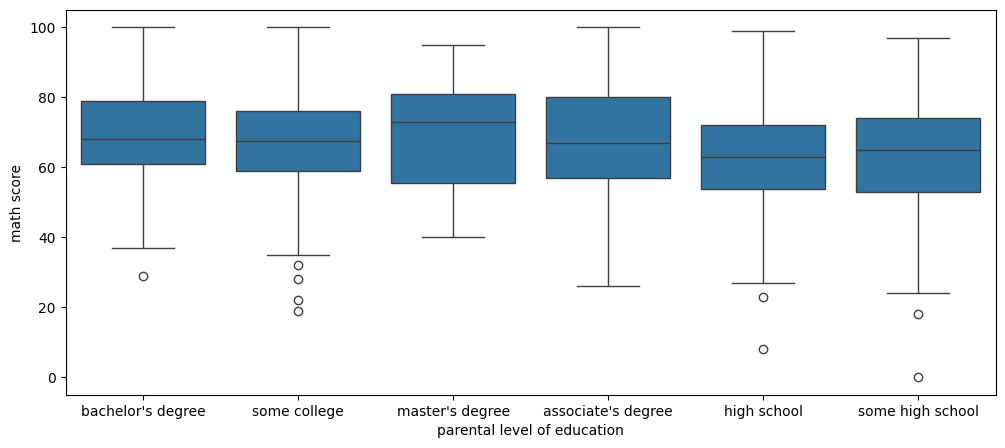

In [ ]:
#Boxplot para a nota de matemática comparando com nível de formação dos pais
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(y=df['math score'], x=df['parental level of education']);

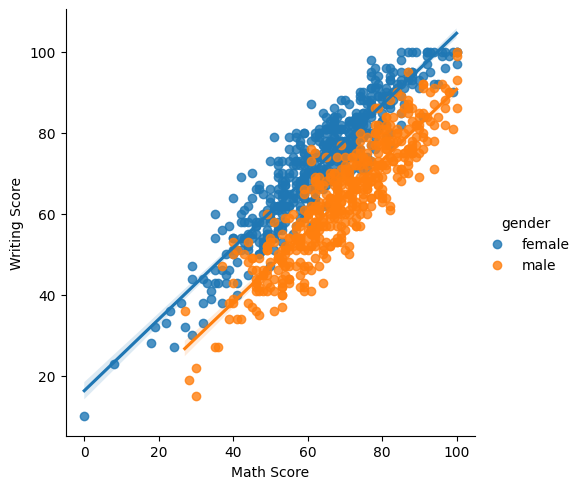

In [ ]:
#Comparação do gênero correlacionando a nota de matemática e escrita
g = sns.lmplot(data=df, x="math score", y="writing score", hue="gender", height=5);
g.set_axis_labels("Math Score", "Writing Score");

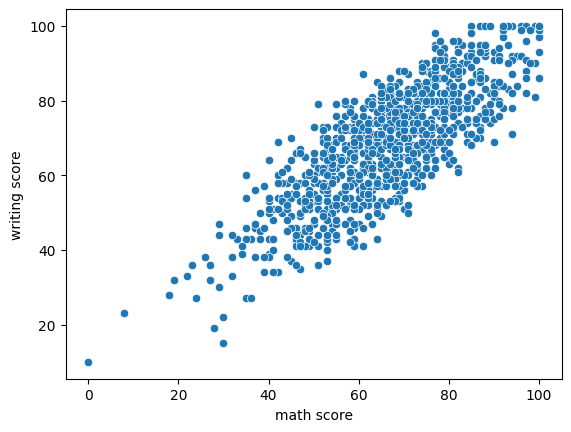

In [ ]:
#Correlação da nota de matemática e escrita
sns.scatterplot(data=df, x='math score', y='writing score');

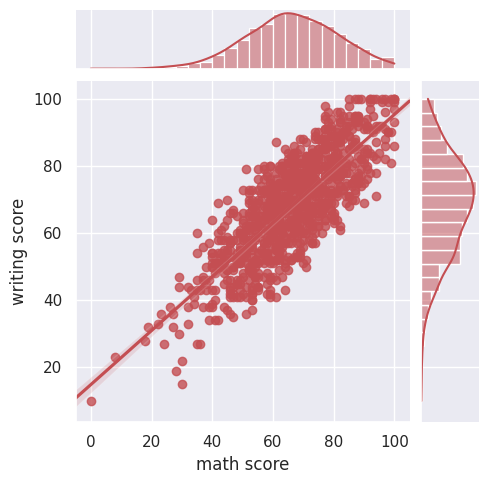

In [ ]:
#Correlação da nota de matemática e escrita utilizando os histogramas em conjunto
sns.set_theme(style="darkgrid")
g = sns.jointplot(x='math score', y='writing score', data=df, kind='reg', truncate=False, color="r", height=5);

BASE Análise de dados_AVC

# BASE análise de dados de AVC = 14/04/25

In [ ]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#leitura da base
base_df = pd.read_excel('/content/Base_para_análise_AVC.xlsx')

In [ ]:
#apresentação da base
base_df

,Paciente,Pressão alta,Colesterol alto,Triglicérides alto,Pratica esporte,Uso excessivo de alcool,Fumante,Diabético,Teve AVC
0,1,1,1,1,1,1,0,0,1
1,2,1,1,1,1,0,0,1,1
2,3,1,1,1,0,1,0,0,1
3,4,1,1,1,0,0,0,1,1
4,5,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,1,1,0,1,1,0
19996,19997,0,0,1,0,1,1,0,0
19997,19998,0,0,1,0,0,1,1,0
19998,19999,0,0,0,1,1,0,0,0


In [ ]:
#apresentação da base (tamanho)
base_df.shape

(20000, 9)

In [ ]:
#apresentação da base (início)
base_df.head()

,Paciente,Pressão alta,Colesterol alto,Triglicérides alto,Pratica esporte,Uso excessivo de alcool,Fumante,Diabético,Teve AVC
0,1,1,1,1,1,1,0,0,1
1,2,1,1,1,1,0,0,1,1
2,3,1,1,1,0,1,0,0,1
3,4,1,1,1,0,0,0,1,1
4,5,1,1,0,1,1,1,0,1


In [ ]:
#apresentação da base (final)
base_df.tail()

,Paciente,Pressão alta,Colesterol alto,Triglicérides alto,Pratica esporte,Uso excessivo de alcool,Fumante,Diabético,Teve AVC
19995,19996,0,0,1,1,0,1,1,0
19996,19997,0,0,1,0,1,1,0,0
19997,19998,0,0,1,0,0,1,1,0
19998,19999,0,0,0,1,1,0,0,0
19999,20000,0,0,0,1,0,0,1,1


In [ ]:
#apresentação da base (informações)
base_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Paciente                 20000 non-null  int64
 1   Pressão alta             20000 non-null  int64
 2   Colesterol alto          20000 non-null  int64
 3   Triglicérides alto       20000 non-null  int64
 4   Pratica esporte          20000 non-null  int64
 5   Uso excessivo de alcool  20000 non-null  int64
 6   Fumante                  20000 non-null  int64
 7   Diabético                20000 non-null  int64
 8   Teve AVC                 20000 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


In [ ]:
#apresentação da base (estatísticas)
base_df.describe()

,Paciente,Pressão alta,Colesterol alto,Triglicérides alto,Pratica esporte,Uso excessivo de alcool,Fumante,Diabético,Teve AVC
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.472350,0.43585,0.639600,0.376600,0.388500,0.639950,0.636550,0.493250
std,5773.647028,0.499247,0.49588,0.480128,0.484545,0.487421,0.480027,0.481005,0.499967
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,15000.250000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20000.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#contar as quantidades existentes da coluna Teve AVC
base_df['Teve AVC'].value_counts()

,count
Teve AVC,
0,10135
1,9865


In [ ]:
#contar as quantidades existentes de cada coluna exceto a coluna Paciente
for column in base_df.columns:
  if column != 'Paciente':
    print(f"Contagem da quantidade de cada categoria na categoria '{column}':")
    print(base_df[column].value_counts())
    print("-" * 20)

Contagem da quantidade de cada categoria na categoria 'Pressão alta':
Pressão alta
0    10553
1     9447
Name: count, dtype: int64
--------------------
Contagem da quantidade de cada categoria na categoria 'Colesterol alto':
Colesterol alto
0    11283
1     8717
Name: count, dtype: int64
--------------------
Contagem da quantidade de cada categoria na categoria 'Triglicérides alto':
Triglicérides alto
1    12792
0     7208
Name: count, dtype: int64
--------------------
Contagem da quantidade de cada categoria na categoria 'Pratica esporte':
Pratica esporte
0    12468
1     7532
Name: count, dtype: int64
--------------------
Contagem da quantidade de cada categoria na categoria 'Uso excessivo de alcool':
Uso excessivo de alcool
0    12230
1     7770
Name: count, dtype: int64
--------------------
Contagem da quantidade de cada categoria na categoria 'Fumante':
Fumante
1    12799
0     7201
Name: count, dtype: int64
--------------------
Contagem da quantidade de cada categoria na categori

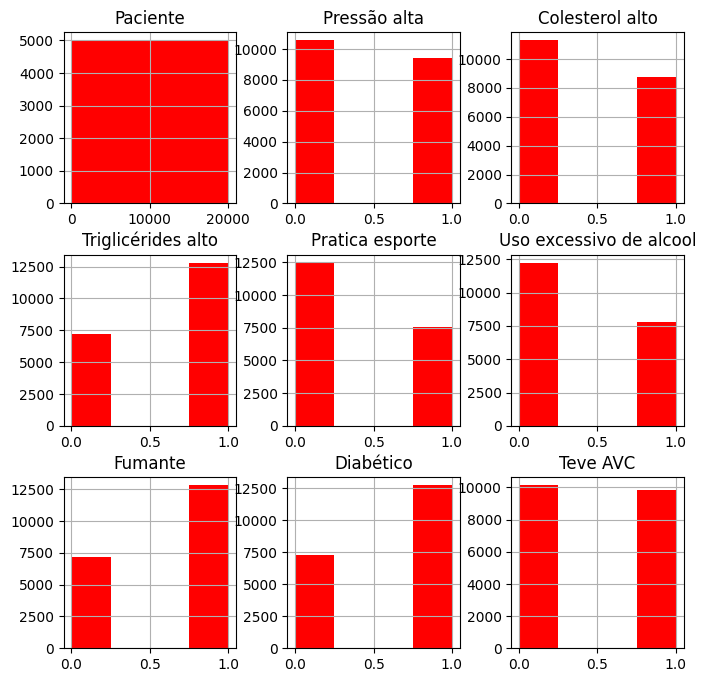

In [ ]:
base_df.hist(bins = 4, figsize=(8,8), color = 'r');

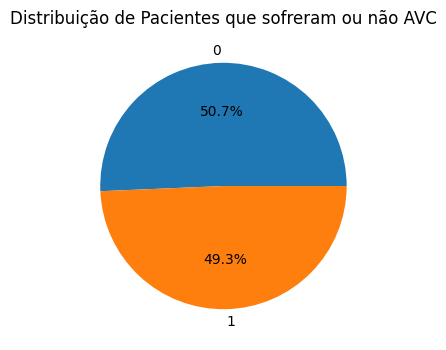

In [ ]:
#criar um gráfico pie para a coluna Teve AVC
base_df['Teve AVC'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Distribuição de Pacientes que sofreram ou não AVC')
plt.ylabel('') # remove y-axis label
plt.show()

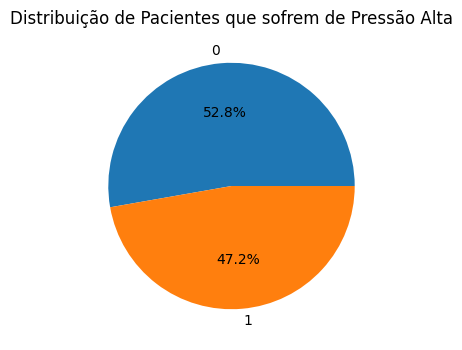

In [ ]:
#criar um gráfico pie para a coluna Pressão Alta
base_df['Pressão alta'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Distribuição de Pacientes que sofrem de Pressão Alta')
plt.ylabel('') # remove y-axis label
plt.show()

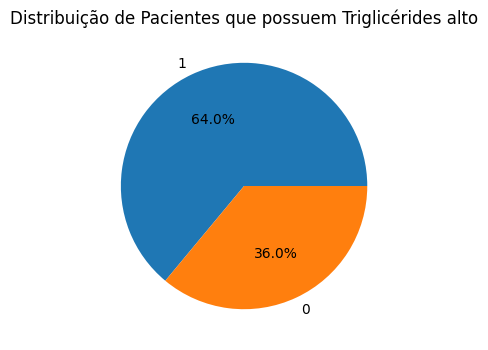

In [ ]:
#criar um gráfico pie para a coluna Triglicérides alto
base_df['Triglicérides alto'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Distribuição de Pacientes que possuem Triglicérides alto')
plt.ylabel('') # remove y-axis label
plt.show()

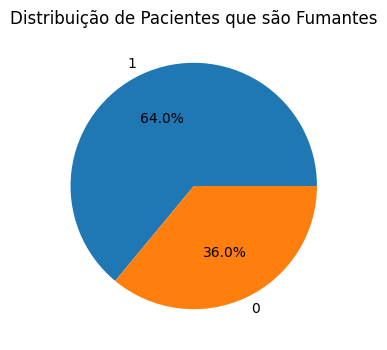

In [ ]:
#criar um gráfico pie para a coluna Fumantes
base_df['Fumante'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Distribuição de Pacientes que são Fumantes')
plt.ylabel('') # remove y-axis label
plt.show()

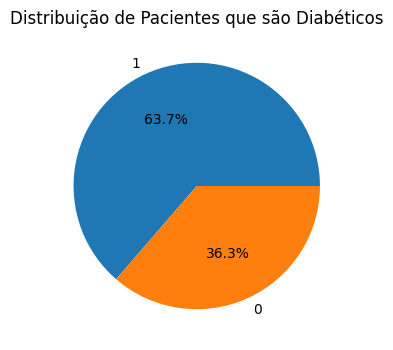

In [ ]:
#criar um gráfico pie para a coluna Diabéticos
base_df['Diabético'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Distribuição de Pacientes que são Diabéticos')
plt.ylabel('') # remove y-axis label
plt.show()

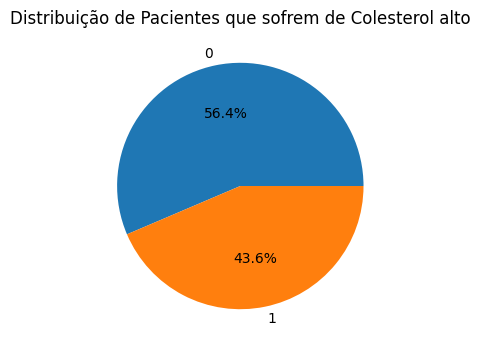

In [ ]:
#criar um gráfico pie para a coluna Colesterol alto
base_df['Colesterol alto'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Distribuição de Pacientes que sofrem de Colesterol alto')
plt.ylabel('') # remove y-axis label
plt.show()

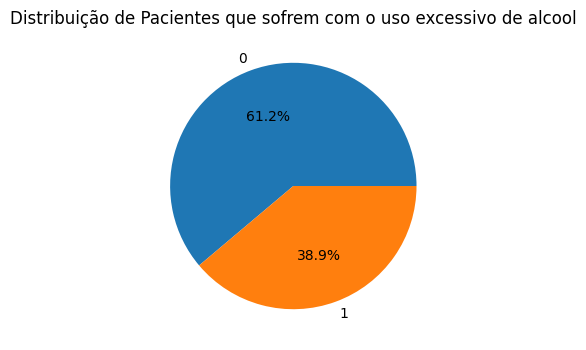

In [ ]:
#criar um gráfico pie para a coluna Diabéticos
base_df['Uso excessivo de alcool'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Distribuição de Pacientes que sofrem com o uso excessivo de alcool')
plt.ylabel('') # remove y-axis label
plt.show()

In [ ]:
#criar gráfico de pizza para a coluna pratica esporte utilizando a biblioteca plotly
fig = px.pie(base_df, names='Pratica esporte', title='Distribuição de Pacientes que praticam esporte')
fig.show()

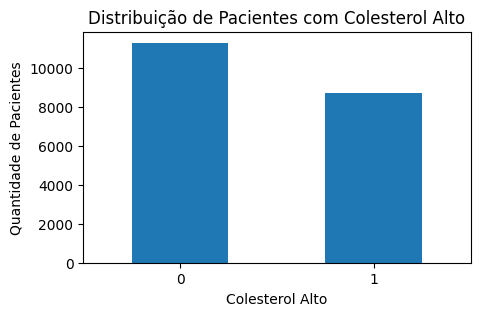

In [ ]:
# Plotar um gráfico de barras para a coluna 'Colesterol alto'
base_df['Colesterol alto'].value_counts().plot(kind='bar', figsize=(5, 3))
plt.title('Distribuição de Pacientes com Colesterol Alto')
plt.xlabel('Colesterol Alto')
plt.ylabel('Quantidade de Pacientes')
plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

In [ ]:
#gráfico de colunas para a coluna Colesterol alto utilizando a biblioteca plotly mostrando a quantidade de pacientes no eixo y
fig = px.histogram(base_df, x="Colesterol alto",
                   title="Distribuição de Pacientes com Colesterol Alto (Plotly)",
                   labels={"Colesterol alto": "Colesterol Alto", "count": "Quantidade de Pacientes"})
fig.show()

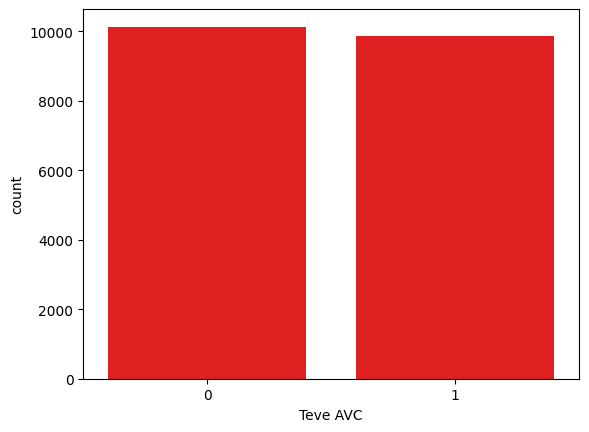

In [ ]:
#Estratificação da separação dos dados de acordo com os grupo de Teve AVC
sns.countplot(data=base_df, x= base_df["Teve AVC"],color="red");

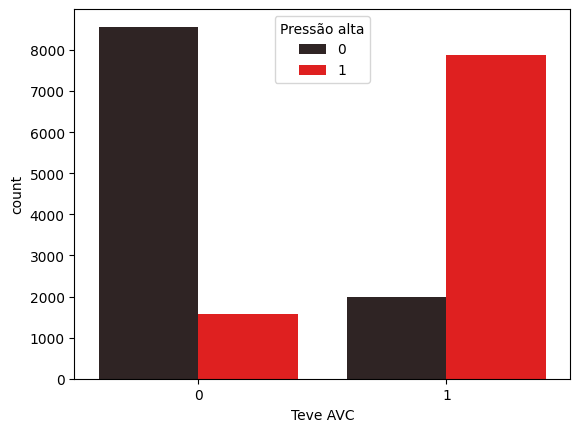

In [ ]:
#Estratificação da separação dos dados de acordo com os grupo de Teve AVC e Pressão alta
sns.countplot(data=base_df, x= base_df["Teve AVC"], hue="Pressão alta", color="red");

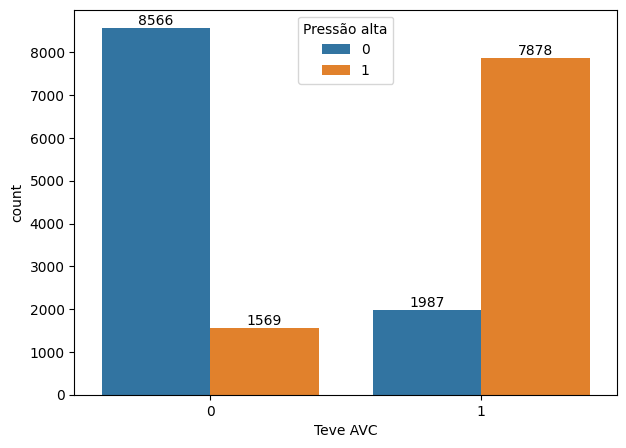

In [ ]:
#Estratificação da separação dos dados de acordo com os grupo de Teve AVC e Pressão alta (ESTRATIFICAÇÃO GRÁFICA APRESENTANDO OS NÚMEROS RELACIONADOS)
fig, ax = plt.subplots(figsize=(7, 5))
ax1 = sns.countplot(data=base_df, x='Teve AVC', hue="Pressão alta")
for i in ax1.containers:
    ax1.bar_label(i,)

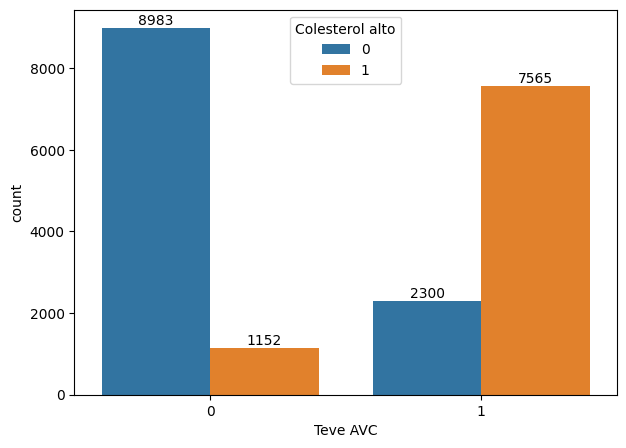

In [ ]:
#Estratificação da separação dos dados de acordo com os grupo de Teve AVC e Colesterol Alto
fig, ax = plt.subplots(figsize=(7, 5))
ax1 = sns.countplot(data=base_df, x='Teve AVC', hue="Colesterol alto")
for i in ax1.containers:
    ax1.bar_label(i,)

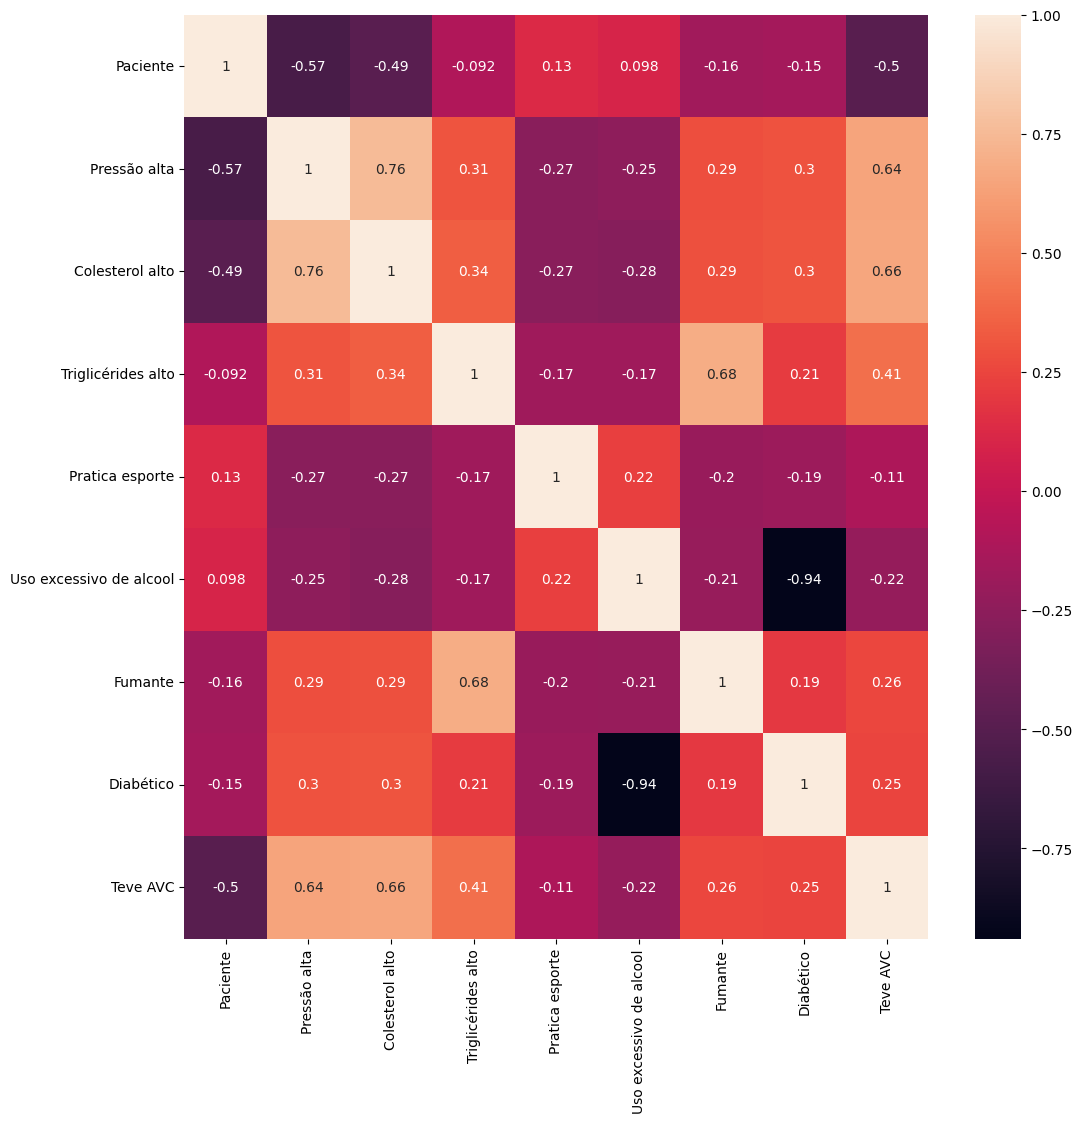

In [ ]:
#MAPA DE CALOR DE CORRELAÇÃO
correlations = base_df.corr()
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(correlations, annot=True);

In [ ]:
#calcular a probabilidade de ter avc na coluna Teve AVC

In [ ]:
# Probabilidade de AVC
total_pacientes = len(base_df)
pacientes_com_avc = len(base_df[base_df['Teve AVC'] == 1])
probabilidade_avc = pacientes_com_avc / total_pacientes

print(f"A probabilidade de ter AVC é: {probabilidade_avc:.3f}")

A probabilidade de ter AVC é: 0.493


In [ ]:
# Probabilidade de AVC sabendo que tem pressão alta
pacientes_com_pressao_alta_e_avc = len(base_df[(base_df['Teve AVC'] == 1) & (base_df['Pressão alta'] == 1)])
pacientes_com_pressao_alta = len(base_df[base_df['Pressão alta'] == 1])
probabilidade_avc_tendo_pressao_alta = pacientes_com_pressao_alta_e_avc / pacientes_com_pressao_alta

In [ ]:
print(f"A probabilidade de ter AVC tendo pressão alta é: {probabilidade_avc_tendo_pressao_alta:.3f}")

A probabilidade de ter AVC tendo pressão alta é: 0.834


In [ ]:
#Calcular a Probabilidade de AVC sabendo que tem pressão alta e colesterol alto
pacientes_com_pressao_alta_colesterol_alto_e_avc = len(base_df[(base_df['Teve AVC'] == 1) & (base_df['Pressão alta'] == 1) & (base_df['Colesterol alto'] == 1)])
pacientes_com_pressao_alta_e_colesterol_alto = len(base_df[(base_df['Pressão alta'] == 1) & (base_df['Colesterol alto'] == 1)])

In [ ]:
probabilidade_avc_tendo_pressao_alta_e_colesterol_alto = pacientes_com_pressao_alta_colesterol_alto_e_avc / pacientes_com_pressao_alta_e_colesterol_alto


In [ ]:
print(f"A probabilidade de ter AVC tendo pressão alta e colesterol alto é: {probabilidade_avc_tendo_pressao_alta_e_colesterol_alto:.3f}")


A probabilidade de ter AVC tendo pressão alta e colesterol alto é: 0.882


In [ ]:
# Calcular a probabilidade de AVC sabendo que tem pressão alta, colesterol alto e triglicerídes alto
pacientes_com_pressao_alta_colesterol_alto_triglicerideos_alto_e_avc = len(base_df[(base_df['Teve AVC'] == 1) & (base_df['Pressão alta'] == 1) & (base_df['Colesterol alto'] == 1) & (base_df['Triglicérides alto'] == 1)])
pacientes_com_pressao_alta_colesterol_alto_triglicerideos_alto = len(base_df[(base_df['Pressão alta'] == 1) & (base_df['Colesterol alto'] == 1) & (base_df['Triglicérides alto'] == 1)])

probabilidade_avc_tendo_pressao_alta_colesterol_alto_triglicerideos_alto = pacientes_com_pressao_alta_colesterol_alto_triglicerideos_alto_e_avc / pacientes_com_pressao_alta_colesterol_alto_triglicerideos_alto

print(f"A probabilidade de ter AVC tendo pressão alta, colesterol alto e triglicerídes alto é: {probabilidade_avc_tendo_pressao_alta_colesterol_alto_triglicerideos_alto:.3f}")


A probabilidade de ter AVC tendo pressão alta, colesterol alto e triglicerídes alto é: 0.947


In [ ]:
X_all = base_df[['Pressão alta', 'Colesterol alto', 'Triglicérides alto',	'Pratica esporte', 'Uso excessivo de alcool','Fumante','Diabético']]
X_all

,Pressão alta,Colesterol alto,Triglicérides alto,Pratica esporte,Uso excessivo de alcool,Fumante,Diabético
0,1,1,1,1,1,0,0
1,1,1,1,1,0,0,1
2,1,1,1,0,1,0,0
3,1,1,1,0,0,0,1
4,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...
19995,0,0,1,1,0,1,1
19996,0,0,1,0,1,1,0
19997,0,0,1,0,0,1,1
19998,0,0,0,1,1,0,0


In [ ]:
y_all = base_df['Teve AVC']
y_all

,Teve AVC
0,1
1,1
2,1
3,1
4,1
...,...
19995,0
19996,0
19997,0
19998,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25)


In [ ]:
X_train.shape, y_train

((15000, 7),
 4207     1
 3250     1
 5232     0
 17616    0
 4636     0
         ..
 5439     0
 13853    0
 14670    0
 3438     1
 7785     0
 Name: Teve AVC, Length: 15000, dtype: int64)

In [ ]:
X_test.shape, y_test


((5000, 7),
 1794     1
 8485     1
 14134    1
 7817     1
 1457     1
         ..
 14984    0
 18625    0
 16029    0
 16598    0
 6197     1
 Name: Teve AVC, Length: 5000, dtype: int64)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = logistic.predict(X_test)


In [ ]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test


,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8664

In [ ]:
from sklearn.metrics import confusion_matrix


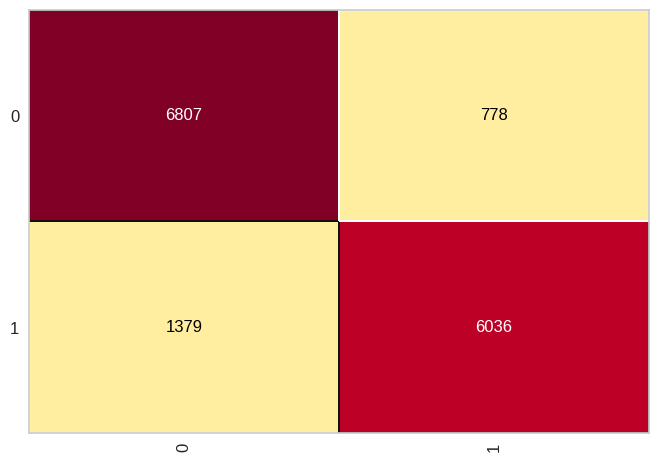

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic);
cm.fit(X_train, y_train);
cm.score(X_train, y_train);

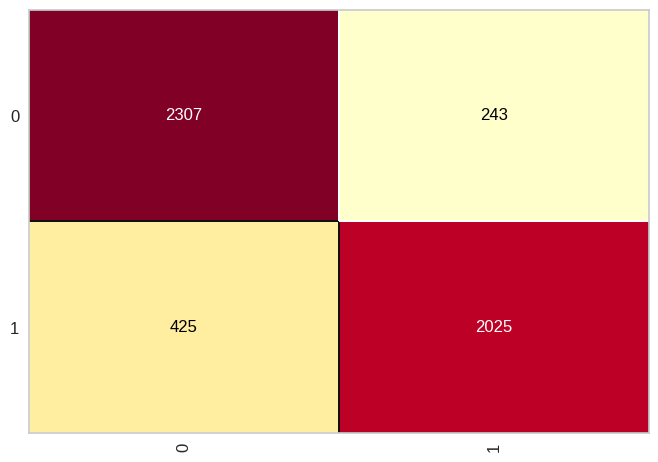

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic);
cm.fit(X_train, y_train);
cm.score(X_test, y_test);

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
previsoes_knn = knn.predict(X_test)
previsoes_knn

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
y_test

,Teve AVC
3069,1
6178,1
13233,0
6669,1
8323,1
...,...
13711,0
6096,1
2193,0
19227,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes_knn) * 100.0))


Acurácia: 91.14%


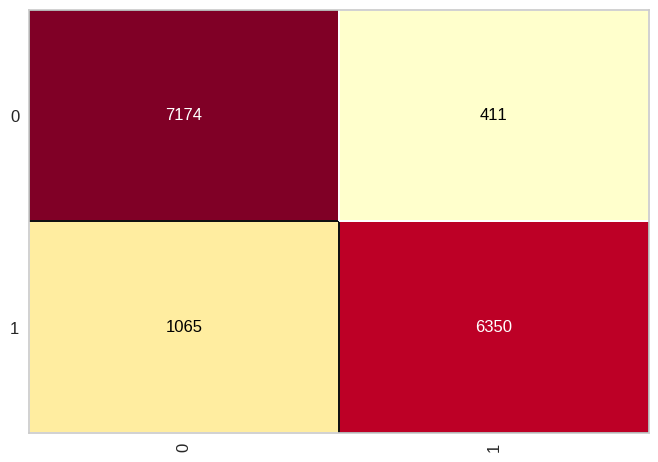

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn);
cm.fit(X_train, y_train);
cm.score(X_train, y_train);

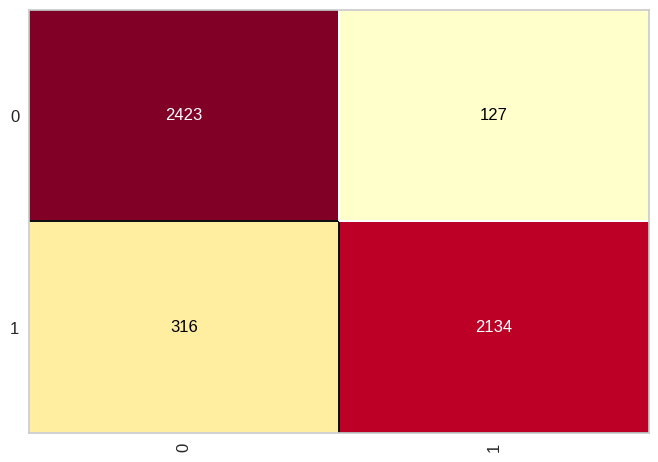

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn);
cm.fit(X_train, y_train);
cm.score(X_test, y_test);

#kNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
previsoes_knn = knn.predict(X_test)
previsoes_knn

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test


,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes_knn) * 100.0))


Acurácia: 91.44%


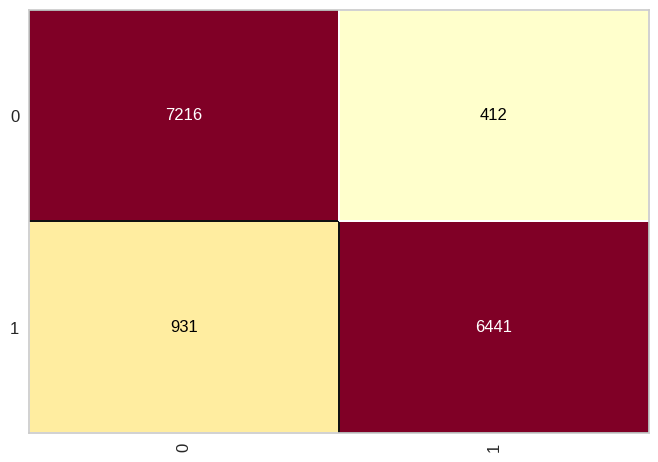

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn);
cm.fit(X_train, y_train);
cm.score(X_train, y_train);

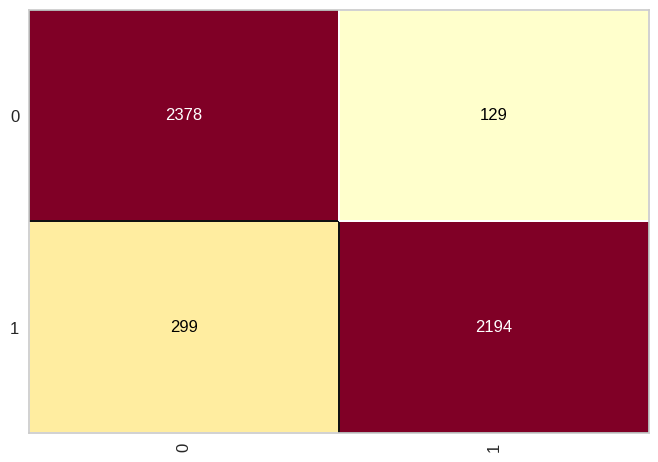

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn);
cm.fit(X_train, y_train);
cm.score(X_test, y_test);

#SVM


In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_avc = SVC(kernel='sigmoid', random_state=1, C = 2.0) # 2 -> 4
svm_avc.fit(X_train, y_train)


SVC(C=2.0, kernel='sigmoid', random_state=1)

In [ ]:
previsoes = svm_avc.predict(X_test)
previsoes


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
y_test

,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.3912

In [ ]:
svm_avc = SVC(kernel='linear', random_state=1, C = 2.0) # 2 -> 4
svm_avc.fit(X_train, y_train)

SVC(C=2.0, kernel='linear', random_state=1)

In [ ]:
previsoes = svm_avc.predict(X_test)
previsoes

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test

,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.8586

0.8586

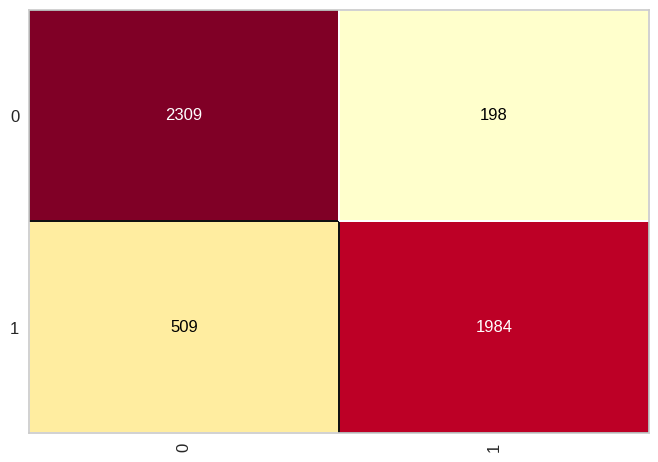

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_avc)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

#Árvores de decisão


In [ ]:
#Carregar o algoritmo da árvore de decisão
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Carregar o algoritmo da árvore de decisão
from sklearn.tree import DecisionTreeClassifier


In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
arvore.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
previsoes_arvore = arvore.predict(X_test)
previsoes_arvore

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test


,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes_arvore) * 100.0))


Acurácia: 88.90%


In [ ]:
arvore = DecisionTreeClassifier(criterion='gini', random_state = None, max_depth=3)
arvore.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
previsoes_arvore = arvore.predict(X_test)
previsoes_arvore


array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test

,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes_arvore) * 100.0))


Acurácia: 88.90%


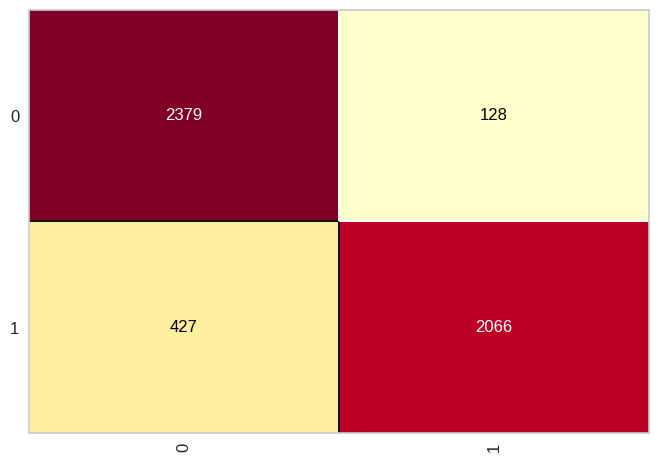

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore);
cm.fit(X_train, y_train);
cm.score(X_test, y_test);

In [ ]:
X = base_df.iloc[:, :-1]  # Todas as colunas menos a última
y = base_df.iloc[:, -1]   # Última coluna como variável alvo

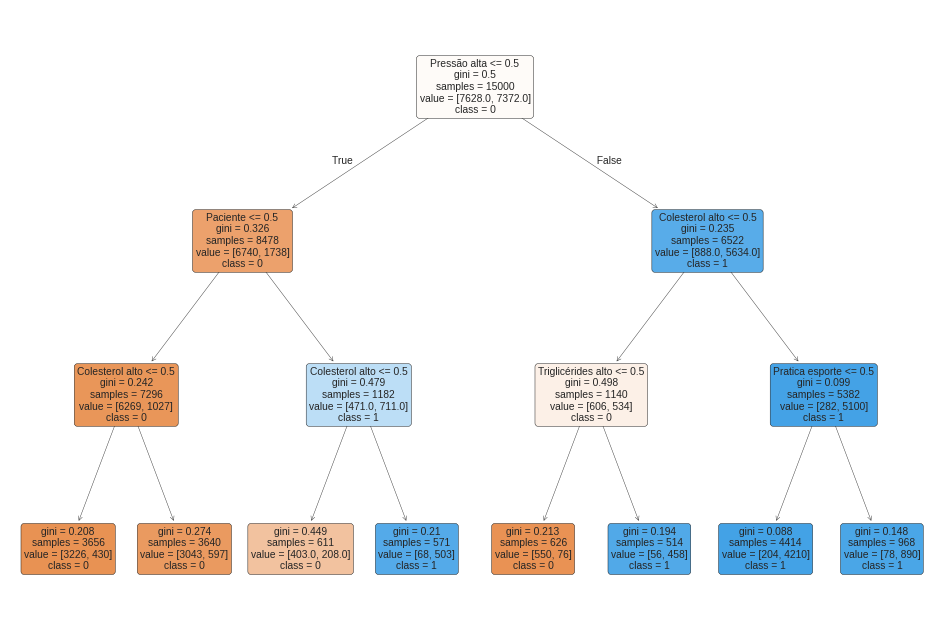

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(arvore, feature_names=X.columns, class_names=[str(c) for c in arvore.classes_], filled=True, rounded=True)
plt.show()

#Florestas aleatórias


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [ ]:
previsoes_random = random.predict(X_test)
previsoes_random

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test


,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes_random) * 100.0))


Acurácia: 89.52%


In [ ]:
tree_to_visualize = random.estimators_[0]


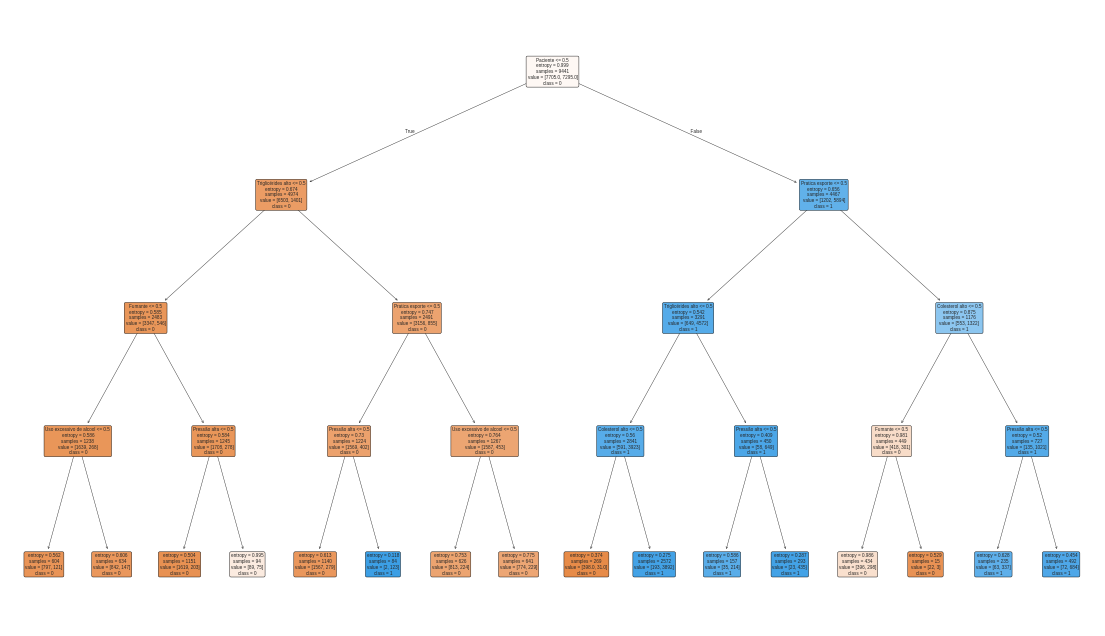

In [ ]:
plt.figure(figsize=(14, 8))
plot_tree(tree_to_visualize, feature_names=X.columns, class_names=[str(c) for c in random.classes_], filled=True, rounded=True)
plt.show()

#Redes Neurais


In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
rede_neural = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000001, solver = 'sgd', activation = 'relu', hidden_layer_sizes = (30,30))
#rede_neural = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = (30,30))
#rede_neural = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000001, solver = 'lbfgs', activation = 'relu', hidden_layer_sizes = (30,30))
#rede_neural = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000001, solver = 'adam', activation = 'logistic', hidden_layer_sizes = (30,30))
#rede_neural = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000001, solver = 'adam', activation = 'tanh', hidden_layer_sizes = (30,30))
rede_neural.fit(X_train, y_train)


Iteration 1, loss = 0.69306981
Iteration 2, loss = 0.66150881
Iteration 3, loss = 0.63132267
Iteration 4, loss = 0.59986699
Iteration 5, loss = 0.56579291
Iteration 6, loss = 0.53102542
Iteration 7, loss = 0.49768328
Iteration 8, loss = 0.46989211
Iteration 9, loss = 0.44899716
Iteration 10, loss = 0.43333541
Iteration 11, loss = 0.42152827
Iteration 12, loss = 0.41245989
Iteration 13, loss = 0.40524119
Iteration 14, loss = 0.39925918
Iteration 15, loss = 0.39414725
Iteration 16, loss = 0.38980372
Iteration 17, loss = 0.38596511
Iteration 18, loss = 0.38255419
Iteration 19, loss = 0.37954322
Iteration 20, loss = 0.37679789
Iteration 21, loss = 0.37434131
Iteration 22, loss = 0.37210277
Iteration 23, loss = 0.37006640
Iteration 24, loss = 0.36822827
Iteration 25, loss = 0.36643396
Iteration 26, loss = 0.36484301
Iteration 27, loss = 0.36328226
Iteration 28, loss = 0.36186934
Iteration 29, loss = 0.36050781
Iteration 30, loss = 0.35920272
Iteration 31, loss = 0.35789608
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1500, solver='sgd',
              tol=1e-07, verbose=True)

In [ ]:
y_test

,Teve AVC
1794,1
8485,1
14134,1
7817,1
1457,1
...,...
14984,0
18625,0
16029,0
16598,0
